# Lab 4
# Import libs and connect to database


In [43]:
import pandas
import configparser
import psycopg2

In [44]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [45]:
cur=conn.cursor()

# q1-4

# q1

In [46]:
q1_sql = """
        select * from gp25.student
        """

In [47]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA


# q2

In [48]:
q2_sql = """
        select gp25.professor.p_namecolumn,
        gp25.course.c_name
        from gp25.professor
        inner join gp25.course
        on gp25.professor.p_email = gp25.course.p_email
        """

In [49]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_namecolumn,c_name
0,Noel Hendrickson,Intro to IA
1,Noel Hendrickson,Counterfactual Reasoning
2,Xubin Wei,Data Mining
3,Timothy Walton,Hypothessis Testing
4,Timothy Walton,Seminars on Issues in IA


# q3

In [50]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp25.enroll_list
        group by c_number
        """

In [51]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]


,c_number,num_enroll
0,IA150,1
1,IA340,3
2,IA300,3
3,IA313,3


<AxesSubplot:xlabel='c_number'>

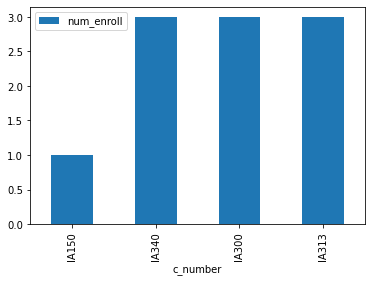

In [52]:
df.plot.bar(x='c_number',y='num_enroll')

# q4

In [53]:
q4_sql = """
        select gp25.professor.p_namecolumn,
        count(gp25.course.c_name) as num_course
        from gp25.professor
        inner join gp25.course
        on gp25.professor.p_email = gp25.course.p_email
        group by gp25.professor.p_namecolumn
        """

In [54]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_namecolumn,num_course
0,Noel Hendrickson,2
1,Timothy Walton,2
2,Xubin Wei,1


<AxesSubplot:xlabel='p_namecolumn'>

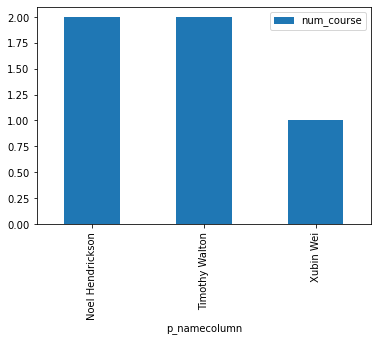

In [55]:
df.plot.bar(x='p_namecolumn',y='num_course')

# q5

In [56]:
q5_insert_professor_sql = """
            insert into gp25.professor(p_email,p_namecolumn,office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp25.professor(p_email,p_namecolumn,office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [57]:
cur.execute(q5_insert_professor_sql)

In [58]:
# conn.rollback() #if error, rollback

In [59]:
df=pandas.read_sql_query('select * from gp25.professor',conn)
df[:]

,p_email,p_namecolumn,office
0,weixx@jmu.edu,Xubin Wei,ISAT 112
1,hendrinx@jmu.edu,Noel Hendrickson,online
2,robinsks@jmu.edu,Kimberly S. Robinson,engeo 2125
3,waltontr@jmu.edu,Timothy Walton,ISAT 326
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [60]:
q5_insert_course_sql = """
            insert into gp25.course(c_number,c_name,room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp25.course(c_number,c_name,room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [61]:
cur.execute(q5_insert_course_sql)

In [62]:
conn.commit() # no error. commit

In [63]:
df=pandas.read_sql_query('select * from gp25.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA150,Intro to IA,engeo 2301,hendrinx@jmu.edu
1,IA313,Counterfactual Reasoning,engeo 1204,hendrinx@jmu.edu
2,IA340,Data Mining,ISAT 0336,weixx@jmu.edu
3,IA 261,Hypothessis Testing,Online,waltontr@jmu.edu
4,IA300,Seminars on Issues in IA,ISAT 150,waltontr@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [64]:
q6_update_course_sql ="""
                    update gp25.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [65]:
cur.execute(q6_update_course_sql)

In [66]:
conn.commit() # no error. commit

In [67]:
df=pandas.read_sql_query('select * from gp25.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA150,Intro to IA,engeo 2301,hendrinx@jmu.edu
1,IA313,Counterfactual Reasoning,engeo 1204,hendrinx@jmu.edu
2,IA340,Data Mining,ISAT 0336,weixx@jmu.edu
3,IA 261,Hypothessis Testing,Online,waltontr@jmu.edu
4,IA300,Seminars on Issues in IA,ISAT 150,waltontr@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [68]:
q6_delete_professor_sql = """
                            delete from gp25.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [69]:
cur.execute(q6_delete_professor_sql)

In [70]:
conn.commit() # no error. commit

In [71]:
df=pandas.read_sql_query('select * from gp25.professor',conn)
df[:]

,p_email,p_namecolumn,office
0,weixx@jmu.edu,Xubin Wei,ISAT 112
1,hendrinx@jmu.edu,Noel Hendrickson,online
2,robinsks@jmu.edu,Kimberly S. Robinson,engeo 2125
3,waltontr@jmu.edu,Timothy Walton,ISAT 326
4,new_lab4_email,new_p_lab4_name,new_lab4_o


# close cursor & connection

In [74]:
cur.close()

In [75]:
conn.close()